In [1]:
import os
import re
import numpy 
import pandas as pd
import itertools
import collections
from functools import partial
from datetime import date
from functools import reduce
from pprint import pprint
from IPython.display import Image
CURRENT_YEAR = date.today().year

```Lambda function is a tool for building callback handlers. The most obvious difference between lambda function and regular
python function is that we do not need to define a function name or explicitly return statement. 
Without naming effort, lambda functions is also called anonymous functions and mostly beneficial when we need need a simple one-off function. 
```

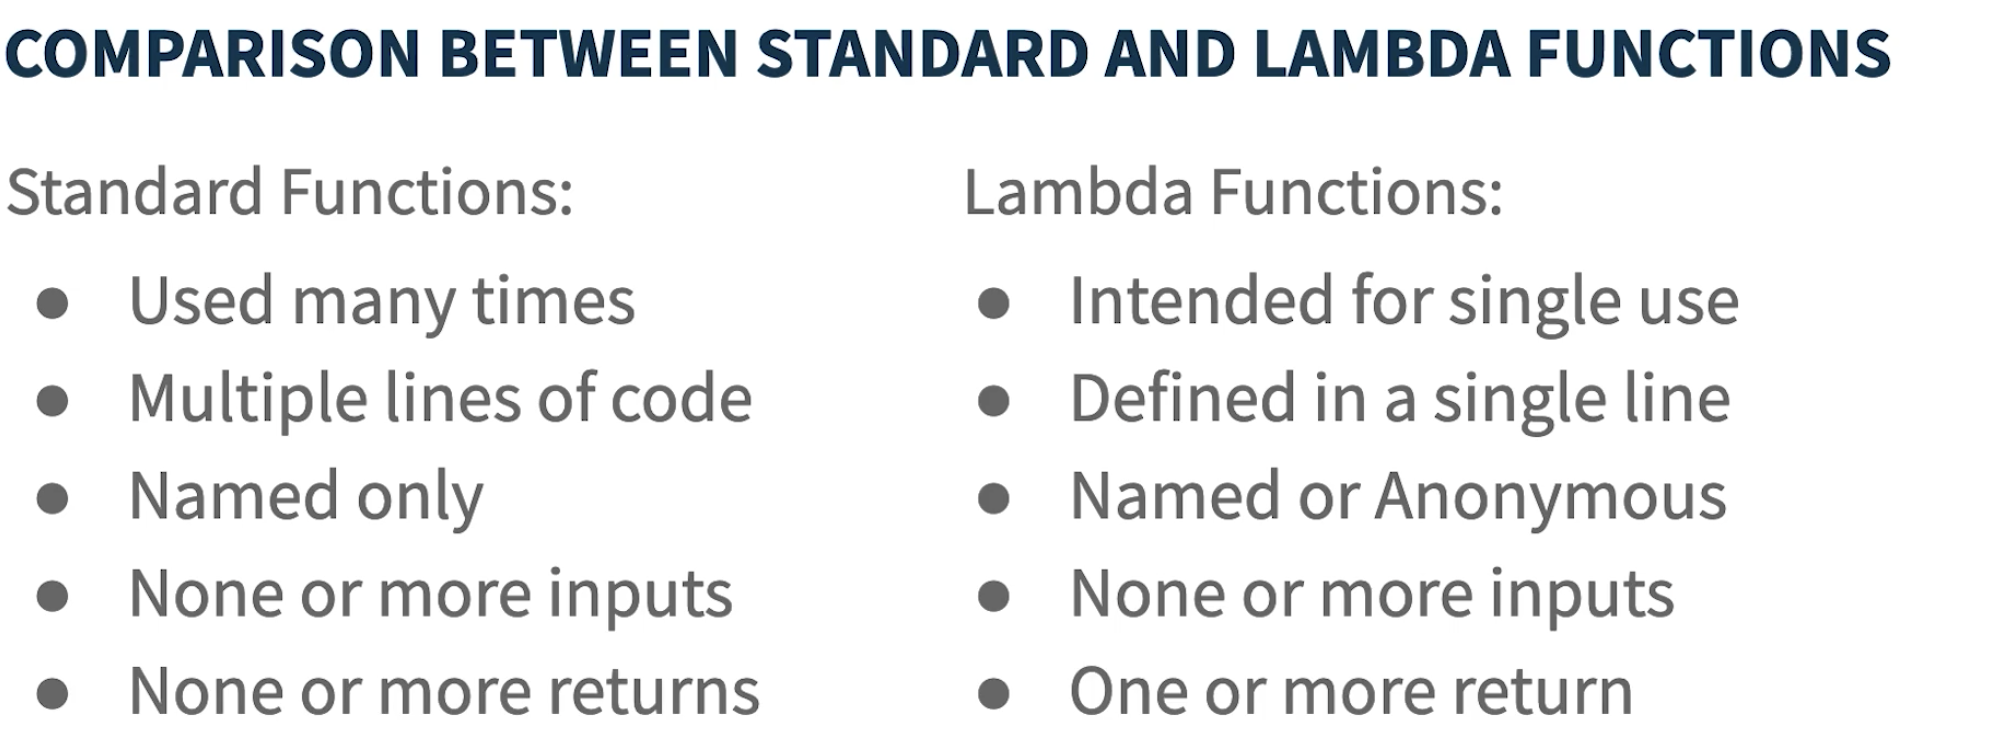

In [2]:
Image(os.path.join(os.path.dirname(os.getcwd()), 'data/difference.png'),
      width=500, height=500)

#### define toy dataset 

In [3]:
# Define Company with attribute of official name, industry, country of headquarter, last funding round type, which year founded, and whether it's public company
Company = collections.namedtuple('Company', [
    'Name',
    'URL',
    'Tag',
    'Industry',
    'Country',
    'State',
    'FundingRound',
    'TotalFunding',
    'YearFounded',
    'IPO',
    'Description'
])

In [4]:
# make toy dataset with companies who are market players in Data and Market Research Players
competitors = [Company(Name='Autonomous Research', URL='autonomous.com', Tag=['Financial', 'Services'], Industry=None, Country='United States', State='New York', FundingRound=None, TotalFunding=0.0, YearFounded=2009, IPO=True, Description='Autonomous Research is an independent research provider on financial institutions globally, servicing clients with research and execution capabilities across the capital structure. It has built a leading voice in the Fintech space via its Autonomous NEXT brand.'),
               Company(Name='Craft', URL='craft.io', Tag=['internet', 'UnitedStates'], Industry='Information Providers & Portals', Country='United States', State='California', FundingRound='Seed VC', TotalFunding=0.0, YearFounded=2015, IPO=False, Description='Craft is a machine-learning powered data and analytics platform that organizes financial, operating and human capital data from thousands of sources with the aim of providing comprehensive, up-to-date sector and company profiles, ranging from early-stage to the largest companies in the world.'),
               Company(Name='Dolcera', URL='dolcera.com', Tag=['Consulting', 'Finance', 'FinTech', 'Intellectual', 'Property', 'Internet'], Industry='Information Providers & Portals', Country='United States', State='California', FundingRound=None, TotalFunding=0.0, YearFounded=2004, IPO=False, Description="Dolcera is a patent analytics companies that offers two software platforms, and a suite of services in the intellectual property space for corporations.  The products include PCS which is Dolcera's flagship patent analytics platform. There other product, Dolcera Dashboard 2.0, lets a patent team classify and manage anywhere from a hundred to several tens of thousands of patents, comments, attachments, and ratings securely."),
               Company(Name='Hatcher+', URL='hatcher.com', Tag=['FinTech', 'Incubators', 'Venture', 'Capital'], Industry='Information Providers & Portals', Country='Singapore', State=None, FundingRound='Seed VC', TotalFunding=9.0, YearFounded=2013, IPO=False, Description='Hatcher+ is a Singapore-based accelerator and investment holding company. With a growing number of established businesses spread across many industries, including data archiving service DropMySite, outdoor advertising marketplace EatAds, working capital platform ApexPeak, home renovation portal KluJe, and online payments platform Telr, Hatcher+ is focused on developing and growing business enablement, financial services, and marketplace platforms in Asia, Africa and the Middle East.'),
               Company(Name='Zirra', URL='zirra.com', Tag=['AI', 'B2B', 'MarketDataPlatform', 'MiddleOffice', 'FinTechInsurance', 'data', 'ArtificialIntelligence', 'financeinsurance', 'DataProvider', 'Startups', 'Pharma', 'marketmap'], Industry='Information Providers & Portals', Country='Israel', State=None, FundingRound='Seed VC', TotalFunding=4.5, YearFounded=2014, IPO=False, Description="Zirra is a Tel Aviv-based company that has developed artificial intelligence technology to evaluate startups to find out how much they're worth. Zirra's offerings include multiple levels of in-depth reports on companies and markets, free analysis memos, company alerts, a ratings calculator, a collaborative Memo Desk, and other products to help guide investors and executives through every stage of the research process."),
               Company(Name='Clarivate Analytics', URL='clarivate.com', Tag=['Analytics', 'Information', 'Services', 'Information', 'Technology', 'Innovation', 'Management'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='United States', State='Pennsylvania', FundingRound=None, TotalFunding=0.0, YearFounded=2016, IPO=True, Description='Clarivate Analytics provides trusted insights and analytics that offers subscription-based services focused on scientific and academic research, life sciences, patent research and intelligence, industry codes and standards and intellectual property management.'),
               Company(Name='Asoko Insight', URL='asokoinsight.com', Tag=['B2B', 'Business', 'Development', 'Information', 'Services'], Industry='Information Providers & Portals', Country='United Kingdom', State='England', FundingRound='Series A', TotalFunding=4.95, YearFounded=2013, IPO=False, Description='Asoko Insight provides corporate information and market intelligence on African growth markets. By providing data and analysis on African companies, Asoko is building a business intelligence platform that will make available intelligent and regularly updated information for regional and global corporations, investors, and governments looking to engage with African companies.'),
               Company(Name='Signals Analytics', URL='signals-analytics.com', Tag=['Analytics', 'Big', 'Data', 'Business', 'Intelligence', 'Intelligent', 'Systems', 'Product', 'Design'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='United States', State='New York', FundingRound='Series C', TotalFunding=50.0, YearFounded=2009, IPO=False, Description="Signals Analytics is a data analytics company that delivers intelligence and insights to support product development and growth. Signals has the ability to support corporate decision-making by turning external 'big data' into insights for strategic commercial decisions. This is powered by an intelligence software platform that Signals developed to quickly transform multiple external data and unstructured data sources covering consumers, markets, and technologies into tangible, constantly updated insights on how to grow products and brands."),
               Company(Name='IPlytics', URL='iplytics.com', Tag=['Analytics', 'Artificial', 'Intelligence', 'Information', 'Technology', 'Software', 'Text', 'Analytics'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='Germany', State=None, FundingRound='Series A', TotalFunding=0.0, YearFounded=2012, IPO=False, Description="IPlytics offers an online-based market intelligence tool (IPlytics Platform) to analyse technology trends, market developments and a company's competitive position. The underlying big data algorithm enables an intelligent linking, processing and visualization of comprehensive data sources such as e.g. patents, M&A deals, industry alliances or standards. With IPlytics Platform, users can easily navigate, analyze, and drill down into information enabling in-depth market analyses or a long term monitoring of particular technologies or market segments."),
               Company(Name='Thomson Reuters', URL='thomsonreuters.com', Tag=['Analytics', 'FinTech', 'Risk', 'Management'], Industry='Accounting & Finance Services', Country='United States', State='New York', FundingRound=None, TotalFunding=0.0, YearFounded=2008, IPO=False, Description='Thomson Reuters (NYSE: TRI) provides news and information for professionals in the financial and risk, legal, tax and accounting, intellectual property and science, and media markets.'),
               Company(Name='ChartMogul', URL='chartmogul.com', Tag=['Business', 'Intelligence', 'Internet', 'SaaS', 'Software'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='United Kingdom', State='England', FundingRound='Series A', TotalFunding=3.7, YearFounded=2014, IPO=False, Description='ChartMogul gives users an aerial view of their global subscriber base: Monthly recurring revenue, churn and lifetime value are presented in a dashboard.'),
               Company(Name='ProSeeder Technologies', URL='proseeder.com', Tag=['Enterprise', 'Software', 'FinTech', 'Innovation', 'Management', 'SaaS', 'Security', 'Software', 'Venture', 'Capital'], Industry='Asset & Financial Management & Trading', Country='United States', State='New York', FundingRound='Series A', TotalFunding=6.26, YearFounded=2012, IPO=False, Description="ProSeeder Technologies is a SaaS-based operating system for private financial transactions. The system enables investment organizations and entrepreneurs to manage all aspects of investment and fundraising activities on one system. ProSeeder's technology is easily customizable for angel networks, venture capital funds, family offices, broker dealers and individual entrepreneurs."),
               Company(Name='Dealogic', URL='dealogic.com', Tag=['CapitalMarkets', 'DataProvider'], Industry=None, Country='United Kingdom', State='England', FundingRound='Corporate Minority', TotalFunding=0.0, YearFounded=1983, IPO=True, Description='Dealogic is the platform utilized by Investment Banks worldwide to optimize performance and improve competitiveness.'),
               Company(Name='Uzabase', URL='uzabase.com', Tag=['Digital', 'Media', 'Finance', 'Information', 'Technology', 'News'], Industry='Information Providers & Portals', Country='Japan', State=None, FundingRound='Venture Capital', TotalFunding=4.5, YearFounded=2008, IPO=True, Description="Uzabase (TYO: 3966) provides information infrastructure supporting decision-making in business activities. Uzabase's NewsPicks is a personalized business news curation service. SPEEDA is the information platform comprising comprehensive company and industry analysis tailored for business professionals."),
               Company(Name='PatSnap', URL='patsnap.com', Tag=['Analytics', 'Computer', 'Search', 'Engine', 'Software', 'Patent'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='United Kingdom', State='England', FundingRound='Series E', TotalFunding=52.32, YearFounded=2007, IPO=False, Description='PatSnap focuses on providing a suite of IP analytical and management to help businesses make better decisions. PatSnap also offers a comprehensive analysis platform, which allows users to track the development of competitors, identify potential customers and gain insight into the global market. The company is based out of the UK and Singapore, with locations in China and the U.S.'),
               Company(Name='Bureau van Dijk', URL='bvdinfo.com', Tag=['Business', 'Intelligence', 'Consumer', 'Research', 'Information', 'Services', 'Legal', 'Risk', 'Management'], Industry='Information Providers & Portals', Country='Netherlands', State=None, FundingRound='Undisclosed', TotalFunding=0.0, YearFounded=1994, IPO=True, Description='Bureau van Dijk is a publisher of private company information. The company specializes in private company data, corporate ownership including beneficial owners, M&A data and financial strength metrics.'),
               Company(Name='Tracxn Technologies', URL='tracxn.com', Tag=['MarketDataPlatform', 'data', 'DataProvider', 'CBIadded', 'Services'], Industry='Information Providers & Portals', Country='India', State=None, FundingRound='Series D', TotalFunding=16.5, YearFounded=2013, IPO=False, Description='Tracxn provides Comprehensive and Curated information about startups and private companies. The company covers various sectors like Enterprise Security, Storage, Networking, Payments, SAAS, Consumer Internet, Marketplaces, Internet of Things, Bitcoin, and many more.'),
               Company(Name='Money.Net', URL='money.net', Tag=['alternativedata'], Industry=None, Country='United States', State='New York', FundingRound='Series B', TotalFunding=2.0, YearFounded=2014, IPO=False, Description='Investors & Professionals have access to live real-time professional grade financial information for a fraction of the price of the traditional expensive institutional offerings. Company with positive cash flow, thousands of paid subscribers and dozens of enterprise licensing accounts. \n\nThe lines have blurred between the needs of affluent retail investors and institutional professional traders.  Expectations of over 20 million investors in the US, and many others around the world, have increased and they have not been served with an affordable solution.  This is a market long overdue for disruption.  The cost of delivering an experience which wows investors has also dropped, allowing for a much more advanced platform.  Money.Net, already good with a loyal subscriber base, is the perfect s'),
               Company(Name='Zero2ipo', URL='zero2ipo.com.cn', Tag=['Banking', 'Finance', 'Financial', 'Services', 'Information', 'Technology', 'Service', 'Industry', 'Venture', 'Capital'], Industry=None, Country='China', State='Beijing', FundingRound=None, TotalFunding=0.0, YearFounded=1999, IPO=False, Description="Zero2IPO (Ê∏ÖÁßëÈõÜÂõ¢) is an entrepreneurial and investment service platform and investment firm. It engages in research and advisory, data product, conference and forum, information and news, investment training, investment banking service, direct investment, FoF and wealth management, business incubation and fund joint office, and more. Zero2IPO's subsidiaries include Zero2IPO Ventures, Zero2IPO Asset Management, Zero2IPO FoF, Zero2IPO Capital, Zero2IPO Research, Zero2IPO Media, Zero2IPO Training, and Zero2IPO Space."),
               Company(Name='BISON', URL='bison.co', Tag=['Business', 'Intelligence', 'Data', 'Visualization', 'FinTech'], Industry='Information Providers & Portals', Country='United States', State='Massachusetts', FundingRound='Series A', TotalFunding=8.94, YearFounded=2011, IPO=False, Description='Boston Illiquid Securities Offering Network, dba Bison, is a private equity and venture capital market technology monitor. Covering only public data, Bison tracks PE/VC firms and any related fundraising, performance, portfolio, manager, and industry activity.'),
               Company(Name='VentureDeal', URL='venturedeal.com', Tag=['Database', 'Finance', 'Venture', 'Capital'], Industry='Information Providers & Portals', Country='United States', State='California', FundingRound=None, TotalFunding=0.0, YearFounded=2006, IPO=False, Description='VentureDeal is a database that provides information about venture capital, venture-backed technology companies, venture capital firms and transactions in the United States.'),
               Company(Name='L2', URL='l2inc.com', Tag=['Fashion', 'Financial', 'Services', 'Lifestyle', 'Publishing'], Industry='Information Providers & Portals', Country='United States', State='New York', FundingRound='Growth Equity', TotalFunding=16.5, YearFounded=2010, IPO=True, Description="L2 is a subscription-based business intelligence service that benchmarks the digital competence of brands. The company provides member brands with actionable, data-driven insights on their digital performance at a fraction of the cost of traditional consulting. L2 achieves this through its proprietary Digital IQ Index research. L2 Digital IQ Index is the global benchmark for digital performance of consumer brands. By analyzing more than 850 data points across dimensions including ‚Äì Site & E-Commerce, Digital Marketing, Social Media, and Mobile ‚Äì the company quantitatively diagnoses brands' digital strengths and weaknesses and ranks peer-to-peer performance."),
               Company(Name='36kr Group', URL='', Tag=['Finance', 'Financial', 'Services', 'Social', 'Media', 'Venture', 'Capital'], Industry='Information Providers & Portals', Country='China', State='Beijing', FundingRound='Series E', TotalFunding=60.57, YearFounded=2011, IPO=False, Description='36kr Group is a technology company that provides media exposure, office space, funding and financing connection, and other services for startups and small to medium companies. The group owns 36kr Media, a media platform that focuses on technology venture news, Kr Space, a shared workspace, and Jingdata, a primary market financial data provider.'),
               Company(Name='BrightSun Technologies', URL='brightsungroup.com', Tag=['Analytics', 'B2B', 'Big', 'Data', 'FinTech', 'Venture', 'Capital'], Industry='Information Providers & Portals', Country='United Kingdom', State='England', FundingRound='Angel', TotalFunding=0.2, YearFounded=2013, IPO=False, Description="BrightSun Technologies (Bright*Sun) aims to change the way Venture Capital and Private Equity firms source and track deals. Bright*Sun is designed to help find diamonds in the rough - deals that would otherwise be off investors' radars. To do this, the tool consumes tremendous amounts of data. News, company databases, information from incubators and university labs, and many more data sources are used as inputs into an algorithm that recommends investment ideas based on an investor's specific criteria."),
               Company(Name='DataFox', URL='datafox.com', Tag=['Advertising', 'Business', 'Intelligence', 'Consulting', 'Enterprise', 'Software', 'Information', 'Technology', 'Machine', 'Learning', 'Sales', 'Automation'], Industry='Information Providers & Portals', Country='United States', State='California', FundingRound='Series B', TotalFunding=11.73, YearFounded=2013, IPO=True, Description='DataFox automates prospecting by providing real-time alerts for the companies users care about. Users can customize notifications and know the right time to reach out.'),
               Company(Name='CB Insights', URL='cbinsights.com', Tag=['Analytics', 'Angel', 'Investment', 'Database', 'Software', 'Venture', 'Capital'], Industry='Information Providers & Portals', Country='United States', State='New York', FundingRound='Series A', TotalFunding=10.02, YearFounded=2008, IPO=False, Description='CB Insights builds technology that helps corporations guess less and win more. The company aggregates and analyzes massive amounts of data and uses machine learning, algorithms and data visualization to help corporations replace the three Gs (Google searches, gut instinct and guys with MBAs*) so they can answer massive strategic questions using probability not punditry. With backing from the National Science Foundation and venture capital investors, CB Insights mines terabytes of data and knowledge contained in patents, venture capital financings, M&A transactions, hiring, startup and investor websites, news sentiment, social media chatter, and more. Its software algorithmically analyzes this data to help clients see where the world is going tomorrow, today.'),
               Company(Name='Mattermark', URL='mattermark.com', Tag=['Big', 'Data', 'Enterprise', 'Software', 'Venture', 'Capital'], Industry='Information Providers & Portals', Country='United States', State='California', FundingRound='Series B', TotalFunding=16.1, YearFounded=2012, IPO=True, Description="Referly, dba Mattermark, is an online platform to uncover promising startups with independent research on the market traction, product development, and team composition of the fastest growing private companies, offering data from a broad range of sources including social media, news coverage, corporate filings, AngelList, Crunchbase, and the company's Startup Index score. Real-time alerts and weekly email digests amplify signals through the noise. Users can identify companies at every stage, from bootstrapped to IPO."),
               Company(Name='PrivCo', URL='privco.com', Tag=['Analytics', 'Consulting', 'Finance', 'Financial', 'Services'], Industry=None, Country='United States', State='New York', FundingRound=None, TotalFunding=0.0, YearFounded=2011, IPO=False, Description='PrivCo is a research firm that provides data on private companies.'),
               Company(Name='Selerity', URL='seleritycorp.com', Tag=['Artificial', 'Intelligence', 'Data', 'Mining', 'FinTech', 'Natural', 'Language', 'Processing', 'Real', 'Time', 'Sales', 'Automation'], Industry='Accounting & Finance', Country='United States', State='New York', FundingRound='Series C', TotalFunding=14.6, YearFounded=2008, IPO=True, Description="Selerity is a financial technology company using A.I. to deliver content and data solutions designed to automate workflows in finance. Selerity's flagship product, Selerity Context, offers contextual search solutions for the capital markets and digital wealth industries, while the Company's Private Context Engine (PCE) analyzes digital communications to power workflow automation for credit investors."),
               Company(Name='Owlin', URL='owlin.com', Tag=['Analytics', 'Artificial', 'Intelligence', 'Big', 'Data', 'FinTech', 'Machine', 'Learning', 'Natural', 'Language', 'Processing'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='Netherlands', State=None, FundingRound='Series A', TotalFunding=3.77, YearFounded=2012, IPO=False, Description='Owlin turns news into intelligence by making news analysis tools for the financial market. Owlin uses artificial intelligence and machine learning technologies to monitor, analyze, and visualize more than news sources worldwide - in different languages and in near real-time.'),
               Company(Name='Owler', URL='owler.com', Tag=['Business', 'Information', 'Systems', 'Business', 'Intelligence', 'Crowdsourcing', 'Internet', 'Market', 'Research'], Industry='Information Providers & Portals', Country='United States', State='California', FundingRound='Series B', TotalFunding=19.3, YearFounded=2011, IPO=False, Description='Owler, formerly InfoArm, provides crowdsourced competitive intelligence for businesses. It offers affordable Competitive Intelligence Reports created by a global community of researchers motivated by a crowdsourced revenue-share model.'),
               Company(Name='eMarketer', URL='emarketer.com', Tag=['Advertising', 'Business', 'Intelligence', 'ECommerce', 'Market', 'Research', 'Mobile', 'Social', 'Media'], Industry='Market, Industry & Competitive Research', Country='United States', State='New York', FundingRound='Growth Equity', TotalFunding=25.0, YearFounded=1998, IPO=True, Description='eMarketer offers research about marketing in a digital world. More than 200,000 professionals at thousands of companies worldwide rely on eMarketer research because of its rigorous approach of aggregating and analyzing information from more than 3,000 global sources. The result is eMarketer data, reports and insights that enable professionals to understand marketing trends, consumer behavior and get the data needed to develop winning strategies.'),
               Company(Name='SimilarWeb', URL='similarweb.com', Tag=['Advertising', 'Analytics', 'Business', 'Intelligence', 'Digital', 'Marketing', 'Internet', 'Market', 'Research'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='United States', State='New York', FundingRound='Series F', TotalFunding=105.1, YearFounded=2007, IPO=False, Description="SimilarWeb, formerly SimlarGroup, is an online presence tool which helps marketers discover their most important traffic insights. SimilarWeb doesn't rely on any single channel for data collection. The Israeli-U.S. company works with a wide variety of sources to create the most accurate and reliable picture of the digital world. All of this data is fed into SimilarWeb's data processing servers where the company turns billions of daily data points into insightful information."),
               Company(Name='DueDil', URL='duedil.com', Tag=['Data', 'Integration', 'Information', 'Services', 'Risk', 'Management'], Industry='Information Providers & Portals', Country='United Kingdom', State='England', FundingRound='Series C', TotalFunding=37.6, YearFounded=2011, IPO=False, Description='DueDil offers a database of financial records, litigations, directors search, people search, company credit check and stock information on private companies in the United Kingdom. DueDil enables users to understand the financial performance of competitors, suppliers and customers.'),
               Company(Name='Quid', URL='quid.com', Tag=['DataVisualization', 'DataProvider'], Industry='Information Providers & Portals', Country='United States', State='California', FundingRound='Incubator', TotalFunding=98.5, YearFounded=2010, IPO=True, Description='Quid collects data about companies based on key words, patents, and press releases to create a graph that shows how companies are connected. The company is focused on analyzing tech trends, politics, and conflicts, and is programming software that can track movement of people to investments, research and development, violence, and attacks.'),
               Company(Name='Ayasdi', URL='ayasdi.com', Tag=['Analytics', 'Artificial', 'Intelligence', 'Big', 'Data', 'Data', 'Visualization', 'FinTech', 'Machine', 'Learning'], Industry=None, Country='United States', State='California', FundingRound='Series C', TotalFunding=97.88, YearFounded=2008, IPO=True, Description="Ayasdi combines machine intelligence with an application framework to create operational solutions for Global 500 corporations, governments, healthcare organizations and scientific research institutions around the world. Ayasdi's machine intelligence platform combines scalable compute with a patented framework for machine learning, topological data analysis to enable data scientists, and business to be more productive. Ayasdi's Envision application framework facilitates the rapid development of business-specific, intelligent applications."),
               Company(Name="Hoover's", URL='hoovers.com', Tag=['Business', 'Development', 'Business', 'Intelligence', 'Information', 'Services'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='United States', State='Texas', FundingRound='Venture Capital', TotalFunding=7.45, YearFounded=1990, IPO=True, Description="Hoover's is a provider of industry and market intelligence on public and private companies.\n\nIn March 2003, Hoover's was acquired by Dun & Bradstreet. The valuation of Hoover's was $119 million. Other terms of the deal were not released."),
               Company(Name='S&P Capital IQ', URL='spcapitaliq.com', Tag=['Analytics', 'Banking', 'Consulting', 'Information', 'Technology', 'Software'], Industry='Business Intelligence, Analytics & Performance Mgmt', Country='United States', State='New York', FundingRound='Series C', TotalFunding=68.0, YearFounded=2010, IPO=True, Description='S&P Capital IQ is a provider of multi-asset class and real time data, research and analytics to institutional investors, investment and commercial banks, investment advisors and wealth managers, corporations and universities around the world. The company provides a broad suite of capabilities designed to help track performance, generate alpha, and identify new trading and investment ideas, and perform risk analysis and mitigation strategies. Through desktop solutions such as the S&P Capital IQ, Global Credit Portal and MarketScope Advisor desktops; enterprise solutions such as S&P Capital IQ Valuations, and Compustat; and research offerings, including Leveraged Commentary & Data, Global Markets Intelligence, and company and funds research, S&P Capital IQ sharpens financial intelligence int'),
               Company(Name='Manta Media', URL='manta.com', Tag=['Analytics', 'Financial', 'Services', 'Internet', 'Online', 'Portals', 'Private', 'Social', 'Networking'], Industry='Information Providers & Portals', Country='United States', State='Ohio', FundingRound='Venture Capital', TotalFunding=63.0, YearFounded=1996, IPO=True, Description='Manta Media is an online resource dedicated to small business. The company delivers products, services and educational opportunities that are effective, easy to understand and geared to help business owners become more competitive in their respective industries. The Manta directory boasts millions of unique visitors every month who search its database for individual businesses, industry segments and geographic-specific listings. Business owners can claim and customize their page to improve online visibility and marketability, gain key knowledge vital for success, and find products to help grow and manage their business. The Manta team works hard to deliver helpful news and advice, promotion opportunities and tools for small businesses.'),
               Company(Name='Palantir Technologies', URL='palantir.com', Tag=['Analytics', 'Computer', 'Information', 'Technology', 'Software'], Industry=None, Country='United States', State='California', FundingRound='Undisclosed', TotalFunding=1944.23, YearFounded=2004, IPO=False, Description="Palantir Technologies offers a suite of software applications for integrating, visualizing and analyzing the world's information, supporting datasets including structured, unstructured, relational, temporal and geospatial. Palantir's products are built for real analysis with a focus on security, scalability, ease of use and collaboration. The products are broadly deployed in the intelligence, defense, law enforcement and financial communities."),
               Company(Name='PitchBook Data', URL='pitchbook.com', Tag=['Analytics', 'Finance', 'SaaS', 'Venture', 'Capital'], Industry='Information Providers & Portals', Country='United States', State='Washington', FundingRound='Series B', TotalFunding=14.5, YearFounded=2007, IPO=True, Description='PitchBook is a resource that delivers data, research, and technology through its flagship product, the PitchBook Platform. PitchBook covers the entire breadth of the private capital markets, including venture capital, private equity, and mergers and acquisitions (M&A).'),
               Company(Name='Acuris', URL='acuris.com', Tag=['Media', 'and', 'Entertainment'], Industry='Market, Industry & Competitive Research', Country='United Kingdom', State='England', FundingRound='Corporate Minority', TotalFunding=8.11, YearFounded=2000, IPO=True, Description='Acuris provides proprietary intelligence, data and analytics to principal advisory firms, investment banks, law firms, hedge funds, private equity firms and corporates. Acuris owns a portfolio of products spanning six financial areas including fixed income, transactions, equities, compliance, infrastructure and research.')
]

#### utility functions

In [5]:
def bag_of_words(words):
    "construct a dict from given words, where every word get value True, with list comprehension."
    return dict([(word, True) for word in words])

def bag_of_words_in_set(words, words_to_match):
    "filter words that is satisfied certain preselected criteria"
    return bag_of_words(set(words) & set(words_to_match))

def split_on_uppercase(s, keep_contiguous=True):
    """

    Args:
        s (str): string
        keep_contiguous (bool): flag to indicate we want to 
                                keep contiguous uppercase chars together

    Returns:

    """

    string_length = len(s)
    is_lower_around = (lambda: s[i-1].islower() or 
                       string_length > (i + 1) and s[i + 1].islower())

    start = 0
    parts = []
    for i in range(1, string_length):
        if s[i].isupper() and (not keep_contiguous or is_lower_around()):
            parts.append(s[start: i])
            start = i
    parts.append(s[start:])

    return parts

CRAWLER_HEADER = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
                   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
                   'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
                   'Accept-Encoding': 'none',
                   'Accept-Language': 'en-US,en;q=0.8',
                   'Connection': 'keep-alive'}

REGEX_URL = re.compile(r'\b(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)\b')

def get_domain_from_url(url_text):
    try:
        url_components = tldextract.extract(url_text)
        if url_components:
            return url_components.domain
    except:
        pass
    return url_text

#### Map(), Filter(), Reduce()

```While map(), filter(), reduce() are widely used, we often overlook their power as building blocks of functional programming. 
There are many cases where data transformation functions can take functions as arguments. It’s often less typing (and
clearer) to pass a lambda function as opposed to writing a full-out function declaration or even assigning the lambda function to a local variable.
With lambda functions as argument instead of writing a full-out function declaration, we can implement selection, transformation and aggregation without loop and if statement.
```

###### map()

In [6]:
years_in_business = list(map(lambda x: {'Name': x.Name, 'Age': date.today().year - x.YearFounded}, competitors))
pprint(years_in_business[0:5])

[{'Age': 11, 'Name': 'Autonomous Research'},
 {'Age': 5, 'Name': 'Craft'},
 {'Age': 16, 'Name': 'Dolcera'},
 {'Age': 7, 'Name': 'Hatcher+'},
 {'Age': 6, 'Name': 'Zirra'}]


In [7]:
# # list comprehension
pprint([{'Name': x.Name, 'Age': date.today().year - x.YearFounded} for x in competitors][0:5])

[{'Age': 11, 'Name': 'Autonomous Research'},
 {'Age': 5, 'Name': 'Craft'},
 {'Age': 16, 'Name': 'Dolcera'},
 {'Age': 7, 'Name': 'Hatcher+'},
 {'Age': 6, 'Name': 'Zirra'}]


In [8]:
# sort with lambda function
pprint(sorted(years_in_business, key=lambda x: x['Age'])[0:5])

[{'Age': 4, 'Name': 'Clarivate Analytics'},
 {'Age': 5, 'Name': 'Craft'},
 {'Age': 6, 'Name': 'Zirra'},
 {'Age': 6, 'Name': 'ChartMogul'},
 {'Age': 6, 'Name': 'Money.Net'}]


###### filter()

In [9]:
### competiting force as public company 
pprint(list(filter(lambda x: x.IPO is True, competitors))[0])

Company(Name='Autonomous Research', URL='autonomous.com', Tag=['Financial', 'Services'], Industry=None, Country='United States', State='New York', FundingRound=None, TotalFunding=0.0, YearFounded=2009, IPO=True, Description='Autonomous Research is an independent research provider on financial institutions globally, servicing clients with research and execution capabilities across the capital structure. It has built a leading voice in the Fintech space via its Autonomous NEXT brand.')


###### reduce()

In [10]:
total_years_in_business = reduce(lambda acc, val: acc + val['Age'], years_in_business, 0)
print(total_years_in_business)

###list comprehesion also one-liner
print(sum([company['Age'] for company in years_in_business]))

516
516


In [11]:
## Define Regular function to group companies while looping through
def groupby_industry(companies):
    mapping = {}
    for company in companies:
        if company.Industry:
            mapping.setdefault(company.Industry, []).append(company.Name)
    return mapping

pprint(groupby_industry(competitors))

{'Accounting & Finance': ['Selerity'],
 'Accounting & Finance Services': ['Thomson Reuters'],
 'Asset & Financial Management & Trading': ['ProSeeder Technologies'],
 'Business Intelligence, Analytics & Performance Mgmt': ['Clarivate Analytics',
                                                         'Signals Analytics',
                                                         'IPlytics',
                                                         'ChartMogul',
                                                         'PatSnap',
                                                         'Owlin',
                                                         'SimilarWeb',
                                                         "Hoover's",
                                                         'S&P Capital IQ'],
 'Information Providers & Portals': ['Craft',
                                     'Dolcera',
                                     'Hatcher+',
                                     'Zirra'

In [12]:
# Use reduce() to aggregate from competitor as iterable and defaultdict
def reducer(acc, val):
    if val.Industry:
        acc.setdefault(val.Industry, []).append(val.Name)
    return acc

competitors_by_industry2 = reduce(reducer, competitors, collections.defaultdict(list))

pprint(competitors_by_industry2)

defaultdict(<class 'list'>,
            {'Accounting & Finance': ['Selerity'],
             'Accounting & Finance Services': ['Thomson Reuters'],
             'Asset & Financial Management & Trading': ['ProSeeder '
                                                        'Technologies'],
             'Business Intelligence, Analytics & Performance Mgmt': ['Clarivate '
                                                                     'Analytics',
                                                                     'Signals '
                                                                     'Analytics',
                                                                     'IPlytics',
                                                                     'ChartMogul',
                                                                     'PatSnap',
                                                                     'Owlin',
                                                                

In [20]:
## In this case, lambda function seems to be overused, unless you code terribly as below
# competitors_by_industry3 = {item[0]: list(item[1])
#                             for item in itertools.groupby(competitors, lambda x: x.Industry) if item}
# print(competitors_by_industry3)

#### DataFrame Transformation

In [13]:
df_competitors = pd.DataFrame(competitors)
df_competitors['Age'] = CURRENT_YEAR- df_competitors['YearFounded']
df_competitors.head(3)

,Name,URL,Tag,Industry,Country,State,FundingRound,TotalFunding,YearFounded,IPO,Description,Age
0,Autonomous Research,autonomous.com,"[Financial, Services]",None,United States,New York,None,0.0,2009,True,Autonomous Research is an independent research...,11
1,Craft,craft.io,"[internet, UnitedStates]",Information Providers & Portals,United States,California,Seed VC,0.0,2015,False,Craft is a machine-learning powered data and a...,5
2,Dolcera,dolcera.com,"[Consulting, Finance, FinTech, Intellectual, P...",Information Providers & Portals,United States,California,None,0.0,2004,False,Dolcera is a patent analytics companies that o...,16


###### clean up Tag, which has lower and upper case, and maybe concancated as one words

In [14]:
from nltk.corpus import stopwords
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
from nltk.probability import FreqDist, ConditionalFreqDist

In [15]:
TagtoSplit = lambda x: " ".join([p.lower() for p in split_on_uppercase(x)])
filter_stops = lambda word: len(word) >= 2 and (word not in stopwords.words('english'))

df_competitors['cleaned_tag'] = df_competitors['Tag'].map(lambda x: list(filter(filter_stops, map(TagtoSplit, x))))
df_competitors[['Tag', 'cleaned_tag']].tail(3)

,Tag,cleaned_tag
39,"[Analytics, Computer, Information, Technology,...","[analytics, computer, information, technology,..."
40,"[Analytics, Finance, SaaS, Venture, Capital]","[analytics, finance, saa s, venture, capital]"
41,"[Media, and, Entertainment]","[media, entertainment]"


In [16]:
def bag_of_bigram_words(words, score_fn=BigramAssocMeasures.chi_sq, n=10):
    # first, separate existing bigrams
    bigram_words = list(filter(lambda word: len(word.split()) == 2, words))
    non_bigram_words = [word for word in words if word not in bigram_words]
    bigram_finder = BigramCollocationFinder.from_words(non_bigram_words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bag_of_words(bigram_words + bigrams)

In [17]:
df_competitors.cleaned_tag.apply(bag_of_bigram_words).head(5)

0                    {('financial', 'services'): True}
1                              {'united states': True}
2    {'fin tech': True, ('consulting', 'finance'): ...
3    {'fin tech': True, ('incubators', 'venture'): ...
4    {'middle office': True, 'artificial intelligen...
Name: cleaned_tag, dtype: object

In [18]:
def popular_IPO_entity_tags(company_tags, score_fn=BigramAssocMeasures.chi_sq, min_score=1):
    """high information tag is defined as word that more likely assigned to companies who went public.
    """
    tag_freq = FreqDist()
    ipo_tag_freq = ConditionalFreqDist()
    
    for is_ipo, tags in company_tags:
        for tag in tags:
            tag_freq[tag] += 1
            ipo_tag_freq[is_ipo][tag] += 1
    
    n_xx = ipo_tag_freq.N()
    high_info_words = set()
    
    for is_ipo in ipo_tag_freq.conditions():
        n_xi = ipo_tag_freq[is_ipo].N()
        tag_scores = collections.defaultdict(int)
        for tag, n_ii in ipo_tag_freq[is_ipo].items():
            n_ix = tag_freq[tag]
            score = score_fn(n_ii, (n_ix, n_xi), n_xx)
            tag_scores[tag]=score
    best_tags = [tag for tag, score in tag_scores.items() if score >= min_score]
    high_info_words |= set(best_tags)
    return high_info_words

In [19]:
high_signal_tags = popular_IPO_entity_tags(zip(df_competitors.IPO, df_competitors.cleaned_tag))
print(high_signal_tags)

{'fin tech', 'information', 'venture', 'market data platform', 'database', 'b2b', 'internet', 'systems', 'media', 'capital', 'computer'}


In [20]:
### next we shall look for company who has high ratio of high signal tags but not exited
cutoff_high_signal = 0.5
filter_high_signal = lambda words: len(bag_of_words_in_set(words, high_signal_tags))/len(bag_of_words(words)) > cutoff_high_signal

In [21]:
df_competitors.loc[df_competitors.apply(lambda x: not x.IPO and filter_high_signal(x.cleaned_tag), axis=1)]

,Name,URL,Tag,Industry,Country,State,FundingRound,TotalFunding,YearFounded,IPO,Description,Age,cleaned_tag
3,Hatcher+,hatcher.com,"[FinTech, Incubators, Venture, Capital]",Information Providers & Portals,Singapore,None,Seed VC,9.0,2013,False,Hatcher+ is a Singapore-based accelerator and ...,7,"[fin tech, incubators, venture, capital]"
20,VentureDeal,venturedeal.com,"[Database, Finance, Venture, Capital]",Information Providers & Portals,United States,California,None,0.0,2006,False,VentureDeal is a database that provides inform...,14,"[database, finance, venture, capital]"
23,BrightSun Technologies,brightsungroup.com,"[Analytics, B2B, Big, Data, FinTech, Venture, ...",Information Providers & Portals,United Kingdom,England,Angel,0.2,2013,False,BrightSun Technologies (Bright*Sun) aims to ch...,7,"[analytics, b2b, big, data, fin tech, venture,..."


###### analyze competitors cross industries

In [22]:
## it looks like the first three industry could be merged as one cohort
pprint(df_competitors.groupby('Industry').size())

Industry
Accounting & Finance                                    1
Accounting & Finance Services                           1
Asset & Financial Management & Trading                  1
Business Intelligence, Analytics & Performance Mgmt     9
Information Providers & Portals                        21
Market, Industry & Competitive Research                 2
dtype: int64


In [23]:
industry_cohort = {'Accounting & Finance': 'Financial Services',
                   'Accounting & Finance Services': 'Financial Services',
                   'Asset & Financial Management & Trading': 'Financial Services'}

df_competitors.Industry = df_competitors.Industry.apply(lambda x: industry_cohort.get(x, x))
by_industry = df_competitors.fillna({'Industry': '', 'TotalFunding': 0.00}).groupby('Industry')

get_stats = lambda group, col: {'min': group[col].min(), 
                                'max': group[col].max(), 
                                'count': len(group), 
                                'mean': group[col].mean()}

```Currying is a fun computer science term which means deriving new functions from existing ones by partial argument application.
for example, we can derive new functions from `get_stats` by assign value to `col`, that becomes:
    `partial_total_funding_stats`: get stats of `TotalFunding`
    `partial_year_in_business`: get stats of `Age`
```

In [24]:
# get basic stats of fundraising capability for competitors in different industry
partial_total_funding_stats = partial(get_stats, col='TotalFunding')
by_industry.apply(lambda group: partial_total_funding_stats(group))

Industry
                                                       {'min': 0.0, 'max': 1944.23, 'count': 7, 'mean...
Business Intelligence, Analytics & Performance Mgmt    {'min': 0.0, 'max': 105.1, 'count': 9, 'mean':...
Financial Services                                     {'min': 0.0, 'max': 14.6, 'count': 3, 'mean': ...
Information Providers & Portals                        {'min': 0.0, 'max': 98.5, 'count': 21, 'mean':...
Market, Industry & Competitive Research                {'min': 8.11, 'max': 25.0, 'count': 2, 'mean':...
dtype: object

In [25]:
# get basic stats of year in business for competitors in different industry
partial_year_in_business = partial(get_stats, col='Age')
by_industry.apply(lambda group: partial_year_in_business(group)) #can we add a filter for IPO company only?

Industry
                                                         {'min': 6, 'max': 37, 'count': 7, 'mean': 16.0}
Business Intelligence, Analytics & Performance Mgmt    {'min': 4, 'max': 30, 'count': 9, 'mean': 11.4...
Financial Services                                     {'min': 8, 'max': 12, 'count': 3, 'mean': 10.6...
Information Providers & Portals                        {'min': 5, 'max': 26, 'count': 21, 'mean': 10....
Market, Industry & Competitive Research                 {'min': 20, 'max': 22, 'count': 2, 'mean': 21.0}
dtype: object

In [26]:
# get average of total funding raised weighted by inverse of year in business
by_industry.apply(lambda group: numpy.average(group['TotalFunding'], weights=1.0/group['Age']))

Industry
                                                       220.658208
Business Intelligence, Analytics & Performance Mgmt     23.728941
Financial Services                                       6.854286
Information Providers & Portals                         17.032924
Market, Industry & Competitive Research                 16.152857
dtype: float64

###### extracting company logos from homepage

In [27]:
# !pip install dask
# !pip install tldextract
import requests
import tldextract
import urllib.request
from socket import timeout
from bs4 import BeautifulSoup
import dask.dataframe as dd
import multiprocessing
import concurrent.futures

In [28]:
def fetch_url_data(url):
    req = urllib.request.Request(url, headers=CRAWLER_HEADER)
    page = urllib.request.urlopen(req, timeout=10)
    soup = BeautifulSoup(page.read(), "lxml")
    return soup


def find_logo_url(url_text, company): 
    has_logo = lambda x: re.search(re.compile('logo'), x)
    company_concat = "-".join([cp for cp in company.split()])
    company_domain = get_domain_from_url(url_text)
    has_company = lambda x: re.search(re.compile(f"{company}|{company_concat}|{company_domain}", re.I), x)
    for url in re.findall(REGEX_URL, url_text):
        if has_logo(str(url)) or has_company(str(url)):
            return url_text
    return None


def extract_logo_url(company_name, url):
    "Dummy crawler to extract company logo url from its home page"
    print(f'Extracting {os.getpid()} record {company_name}')
    
    full_url = f"http://www.{url}"
    try:
        soup = fetch_url_data(full_url)
        imgs = soup.findAll("img",{"alt":True, "src":True})
        for img in imgs:
            img_url = img["src"]
            logo_url = find_logo_url(img_url, company_name)
            if logo_url:
                print(f'{os.getpid()} Done processing record {company_name}')
                return logo_url
    except urllib.error.URLError as e:
        print(e.reason)
    except timeout:
        print("time out during web scrapping.")

    print(f'{os.getpid()} Done processing record {company_name}')

In [29]:
%%time
logo_url_results1 = df_competitors.apply(lambda x: extract_logo_url(x.Name, x.URL), axis=1)
# we can see only signle process ID is used in current process with default apply by rows

Extracting 11775 record Autonomous Research
11775 Done processing record Autonomous Research
Extracting 11775 record Craft
11775 Done processing record Craft
Extracting 11775 record Dolcera
11775 Done processing record Dolcera
Extracting 11775 record Hatcher+
11775 Done processing record Hatcher+
Extracting 11775 record Zirra
11775 Done processing record Zirra
Extracting 11775 record Clarivate Analytics
11775 Done processing record Clarivate Analytics
Extracting 11775 record Asoko Insight
11775 Done processing record Asoko Insight
Extracting 11775 record Signals Analytics
11775 Done processing record Signals Analytics
Extracting 11775 record IPlytics
11775 Done processing record IPlytics
Extracting 11775 record Thomson Reuters
11775 Done processing record Thomson Reuters
Extracting 11775 record ChartMogul
11775 Done processing record ChartMogul
Extracting 11775 record ProSeeder Technologies
11775 Done processing record ProSeeder Technologies
Extracting 11775 record Dealogic
11775 Done 

`multiprocessing.Pool` creates multiple processes and spreads out the computations across multiple CPU cores so that they all happen in parallel.

Dask provides advanced parallelism for analytics, enabling performance at scale for the tools you love and is a flexible library for parallel computing in Python"

`threads`: a scheduler backed by a thread pool 
<br>
`processes`: a scheduler backed by a process pool (preferred option on local machines as it uses all CPUs)
<br>
`single-threaded`: a synchronous scheduler, good for debugging


In [30]:
%%time
# let's try to fast the process with Dask library with map_partitions()
# It is very important to set scheduler='processes' to benefit from multiprocessing since the time will differ with `threads` and `single_threaded
logo_url_results2 = dd.from_pandas(df_competitors, npartitions=4*multiprocessing.cpu_count()
                                   ).map_partitions(lambda df: df.apply(lambda row: extract_logo_url(row.Name, row.URL), axis=1)
                                                   ).compute(scheduler="processes")

Extracting 11775 record foo
11775 Done processing record foo
Extracting 11775 record foo
11775 Done processing record foo
Extracting 11775 record Autonomous ResearchExtracting 11775 record DolceraExtracting 11775 record ZirraExtracting 11775 record Asoko Insight


Extracting 11775 record IPlyticsExtracting 11775 record ChartMogulExtracting 11775 record DealogicExtracting 11775 record PatSnap




11775 Done processing record Zirra
Extracting 11775 record Clarivate Analytics
11775 Done processing record ChartMogul
Extracting 11775 record ProSeeder Technologies
11775 Done processing record Clarivate Analytics
Extracting 11775 record Tracxn Technologies
11775 Done processing record PatSnap
Extracting 11775 record Bureau van Dijk
11775 Done processing record Autonomous Research
Extracting 11775 record Craft
11775 Done processing record Asoko Insight
Extracting 11775 record Signals Analytics
11775 Done processing record Craft
Extracting 11775 record Zero2ipo
11775 Done processing record Sign

`concurrent.futures` provides a couple different implementations that allow programmer to easily change based on how computations should happen in parallel (process-based parallelism, get around GIL problem, each thread has its own interpreter).
This object is going to create a pool of threads, each of which can run concurrently.
As a context manager, `ThreadPoolExecutor` automatically runs them concurrently using the pool of threads it is managing.


In [31]:
%%time
with concurrent.futures.ProcessPoolExecutor() as executor:
    logo_url_results3 = list(executor.map(extract_logo_url, df_competitors['Name'], df_competitors['URL'])) # Without a progressbar

Extracting 11785 record Autonomous Research
Extracting 11787 record Dolcera
Extracting 11788 record Hatcher+
Extracting 11790 record Clarivate Analytics
Extracting 11789 record Zirra
Extracting 11786 record Craft
Extracting 11791 record Asoko Insight
Extracting 11792 record Signals Analytics
11789 Done processing record Zirra
Extracting 11789 record IPlytics
11790 Done processing record Clarivate Analytics
Extracting 11790 record Thomson Reuters
11792 Done processing record Signals Analytics
Extracting 11792 record ChartMogul
11785 Done processing record Autonomous Research
Extracting 11785 record ProSeeder Technologies
11790 Done processing record Thomson Reuters
Extracting 11790 record Dealogic
11786 Done processing record Craft
Extracting 11786 record Uzabase
11792 Done processing record ChartMogul
Extracting 11792 record PatSnap
11791 Done processing record Asoko Insight
Extracting 11791 record Bureau van Dijk
11786 Done processing record Uzabase
Extracting 11786 record Tracxn Tech